<a href="https://colab.research.google.com/github/ho44013/machine_study/blob/main/data_science/Clustering_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Clustering Practice

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

def kmeans(k, points):
  prev_assignment = []

  centroids = points[np.random.choice(points.shape[0], replace=False, size=k)]    # 중심점 선택

  for epoch in range(10):
    assignment = [assign(p, centroids, k) for p in points]    # 각 점이 할당될 중심점을 계산
    centroids = compute_centroids(assignment, points, k)    # new 중심점 계산

    if np.all(prev_assignment == assignment):
      break
    prev_assignment = assignment

  return assignment, centroids

def assign(point, centroids, k):
  return min(range(k), key=lambda i: np.dot(centroids[i]-point, centroids[i]-point))

def compute_centroids(assignment, points, k):
  vec_sum = [np.zeros(len(points[0])) for _ in range(k)]
  counts = [0] * k

  for i, p in zip(assignment, points):
    vec_sum[i] += p
    counts[i] += 1

  return [vec_sum[p] / counts[p] if counts[p] > 0 else random.choice(points) for p in range(k)]

In [ ]:
k = 3

points1 = np.random.randn(20, k)
points2 = np.random.randn(20, k) + np.array([5, 5, 5])
points3 = np.random.randn(20, k) + np.array([-5, 5, 0])
points = np.concatenate((points1, points2, points3))

assignments, centroids = kmeans(k, points)

assignments

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

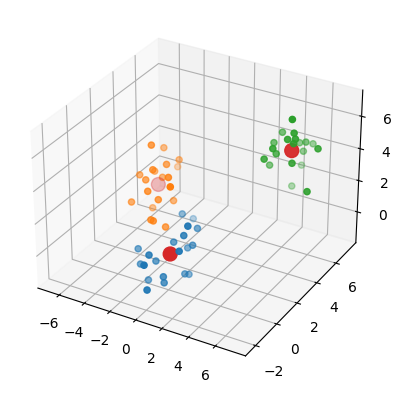

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

clusters = [[] for _ in range(k)]
for a, p in zip(assignments, points):
   clusters[a].append(p)

for cluster in clusters:
   ax.scatter(*zip(*cluster))

ax.scatter(*zip(*centroids), s=100)
plt.show()

In [ ]:
!wget https://img.freepik.com/free-photo/close-up-on-kitten-surrounded-by-flowers_23-2150782329.jpg?size=626&ext=jpg&ga=GA1.1.1826414947.1699920000&semt=ais

--2023-11-29 04:26:54--  https://img.freepik.com/free-photo/close-up-on-kitten-surrounded-by-flowers_23-2150782329.jpg?size=626
Resolving img.freepik.com (img.freepik.com)... 23.54.78.170, 23.54.78.180, 2600:1407:3c00:c::1740:72d1, ...
Connecting to img.freepik.com (img.freepik.com)|23.54.78.170|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56569 (55K) [image/jpeg]
Saving to: ‘close-up-on-kitten-surrounded-by-flowers_23-2150782329.jpg?size=626.1’

close-up-on-kitten- 100%[===================>]  55.24K  --.-KB/s    in 0.01s   

2023-11-29 04:26:54 (4.73 MB/s) - ‘close-up-on-kitten-surrounded-by-flowers_23-2150782329.jpg?size=626.1’ saved [56569/56569]



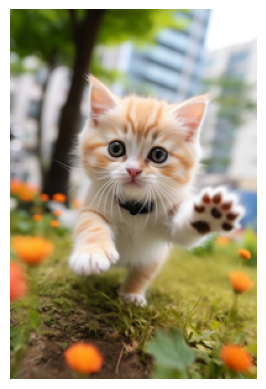

In [ ]:
from PIL import Image

im = Image.open("close-up-on-kitten-surrounded-by-flowers_23-2150782329.jpg?size=626")

width = 200
height = im.height * width // im.width
im = im.resize((width, height))

plt.imshow(im)
plt.axis('off')
plt.show()

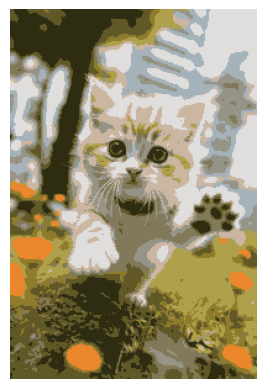

In [ ]:
pixels = np.array(im).reshape(-1, 3)
assignments, centroids = kmeans(10, pixels)

for a, i in zip(assignments, range(pixels.shape[0])):
  pixels[i] = centroids[a]

new_img = pixels.reshape((im.height, im.width, 3))
new_img = Image.fromarray(new_img)
plt.imshow(new_img)
plt.axis('off')
plt.show()

# 2. kNN practice

In [ ]:
!wget https://archive.ics.uci.edu/static/public/53/iris.zip
!unzip iris.zip

--2023-12-05 02:17:30--  https://archive.ics.uci.edu/static/public/53/iris.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘iris.zip’

iris.zip                [ <=>                ]   3.65K  --.-KB/s    in 0s      

2023-12-05 02:17:30 (941 MB/s) - ‘iris.zip’ saved [3738]

Archive:  iris.zip
  inflating: Index                   
  inflating: bezdekIris.data         
  inflating: iris.data               
  inflating: iris.names              


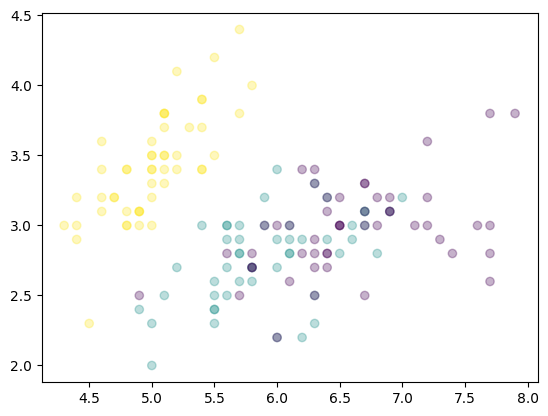

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = []
y = []

for line in open('iris.data', 'r'):
  line = line.strip()
  if line != "":
    tokens = line.split(",")
    X.append([float(t) for t in tokens[:4]])
    y.append(tokens[4])

y_labels = list(set(y))
y = [y_labels.index(a) for a in y]

X = np.array(X)
y = np.array(y)

plt.scatter(X[:,0], X[:,1], c=y, alpha=0.3)
plt.show()

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X_train, y_train)

# y_train_pred = knn.predict(X_train)
# y_test_pred = knn.predict(X_test)

# print("train accuracy:", accuracy_score(y_train_pred, y_train))
# print("test accuracy:", accuracy_score(y_test_pred, y_test))

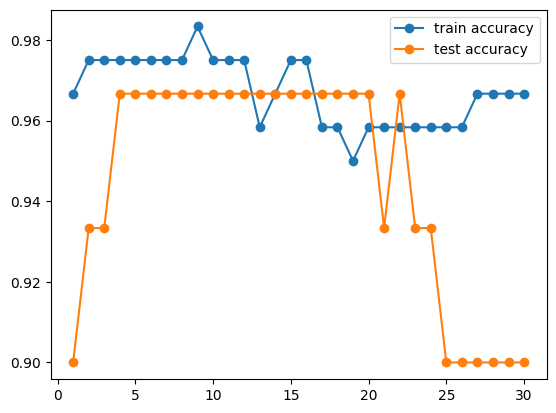

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

scores = []
test_scores = []
k_values = range(1, 31)

for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  score = cross_val_score(knn, X_train, y_train, cv=10, scoring="accuracy")
  scores.append(score.mean())

  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  test_scores.append(accuracy_score(y_test, y_pred))

plt.plot(k_values, scores, '-o', label="train accuracy")
plt.plot(k_values, test_scores, '-o', label="test accuracy")
plt.legend()
plt.show()